--- Phase 1: Data Loading & Initial Setup ---
✅ Dataset Loaded Successfully: 7043 Customer Records Found
✅ Initial Preprocessing Complete. Data is ready for analysis.

--- Phase 2: Data Preparation ---
✅ Data Split Complete: Training on 5634 customers, Testing on 1409 customers.

--- Phase 3: Exploratory Data Analysis ---


/tmp/ipython-input-637755664.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)
/tmp/ipython-input-637755664.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Churn'], palette='pastel')


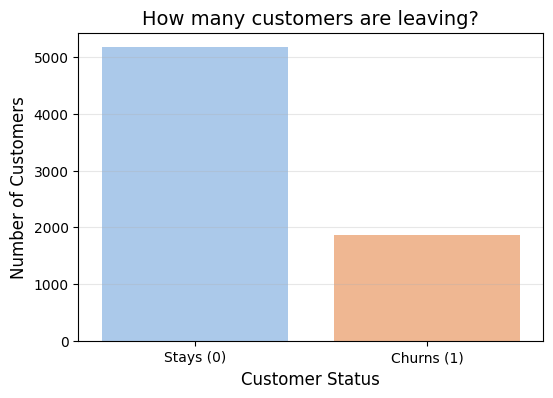

--- Phase 4: Modeling (Training 3 Candidates) ---
✅ Logistic Regression: Trained
✅ Decision Tree: Trained
✅ Random Forest: Trained

--- Phase 5: Evaluation & Comparison ---

🏆 Model Leaderboard (Ranked by Accuracy):
              Model Accuracy Score
Logistic Regression         81.97%
      Decision Tree         80.77%
      Random Forest         79.28%


/tmp/ipython-input-637755664.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy Score', data=results, palette='viridis')


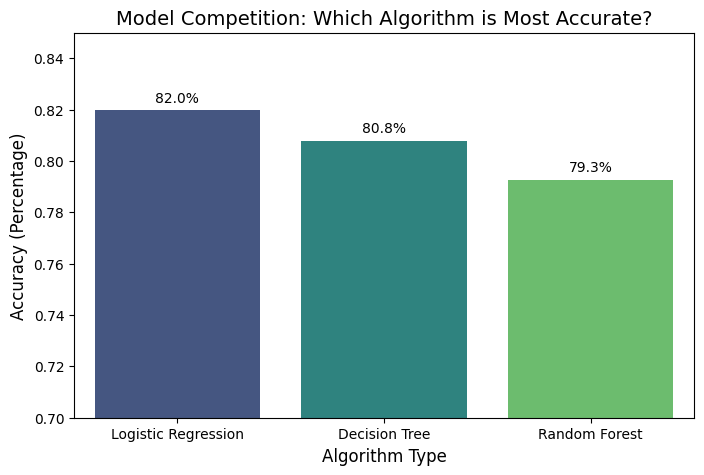


--- Phase 6: Data Product (Churn Calculator Tool) ---
Test Case 1: Risky Customer (New, High Bill, Month-to-Month)
------------------------------------------------------------
📋 Customer Profile: 2 Months Tenure | $90.00/mo Bill | Contract: Month-to-month
⚠️  PREDICTION: HIGH RISK (CHURN)
📊 Confidence: 82.0% probability of leaving.
💡 Recommendation: Offer a 1-year contract discount immediately.
------------------------------------------------------------

Test Case 2: Loyal Customer (Long-time, Low Bill, 2-Year Contract)
------------------------------------------------------------
📋 Customer Profile: 70 Months Tenure | $25.00/mo Bill | Contract: Two year
✅ PREDICTION: SAFE (RETAIN)
📊 Confidence: 89.0% probability of staying.
------------------------------------------------------------

🏆 FINAL VERDICT: The Winning Model is Logistic Regression
   Accuracy: 81.97% (Correctly predicts 81 out of 100 cases)


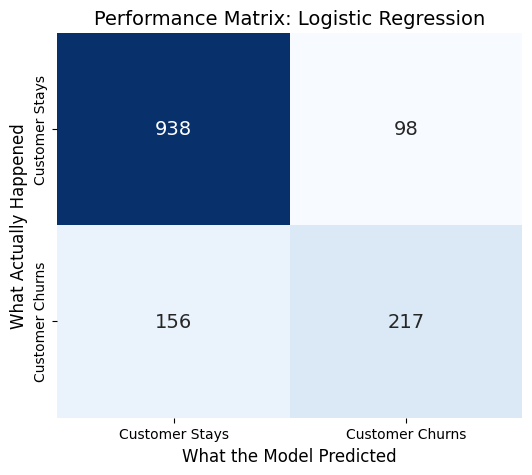

--- Technical Report for Logistic Regression ---
              precision    recall  f1-score   support

   Stays (0)       0.86      0.91      0.88      1036
  Churns (1)       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprocessing & Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==========================================
# PHASE 1: BUSINESS & DATA UNDERSTANDING (Loading Data)
# ==========================================
print("--- Phase 1: Data Loading & Initial Setup ---")

try:
    # Ensure this filename matches your upload exactly
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print(f"✅ Dataset Loaded Successfully: {len(df)} Customer Records Found")
except FileNotFoundError:
    print("❌ ERROR: File not found. Please upload 'WA_Fn-UseC_-Telco-Customer-Churn.csv'")
    raise

# PRELIMINARY CLEANING
# 1. Convert TotalCharges to numeric (handling errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# 2. Encode Target Variable 'Churn' to numbers for the machine to understand
# (Yes -> 1 (Churn), No -> 0 (Stay))
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Define Features (X) and Target (y)
y = df['Churn']
X = df.drop(['Churn', 'customerID'], axis=1)

# 4. One-Hot Encoding (Converting text categories to binary columns)
X = pd.get_dummies(X, drop_first=True)

print("✅ Initial Preprocessing Complete. Data is ready for analysis.\n")

# ==========================================
# PHASE 2: DATA PREPARATION
# ==========================================
print("--- Phase 2: Data Preparation ---")

# 1. Refine Data: Drop 'TotalCharges' to prevent redundancy (Multicollinearity)
X_final = X.drop(['TotalCharges'], axis=1, errors='ignore')

# 2. Split Data: 80% for Training (Learning), 20% for Testing (Exam)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 3. Scale Data: Convert all distinct units (dollars, months) to a standard scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"✅ Data Split Complete: Training on {len(X_train)} customers, Testing on {len(X_test)} customers.\n")

# ==========================================
# PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================
print("--- Phase 3: Exploratory Data Analysis ---")

# Plot Target Balance with Clear Labels
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Churn'], palette='pastel')
plt.title('How many customers are leaving?', fontsize=14)
plt.xlabel('Customer Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0, 1], ['Stays (0)', 'Churns (1)']) # Replace 0/1 with text
plt.grid(axis='y', alpha=0.3)
plt.show()

# ==========================================
# PHASE 4: MODELING (Training 3 Models)
# ==========================================
print("--- Phase 4: Modeling (Training 3 Candidates) ---")

# Model 1: Logistic Regression (The Baseline)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
print("✅ Logistic Regression: Trained")

# Model 2: Decision Tree (The Rule-Based Model)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
print("✅ Decision Tree: Trained")

# Model 3: Random Forest (The Ensemble Model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("✅ Random Forest: Trained\n")

# ==========================================
# PHASE 5: EVALUATION & COMPARISON
# ==========================================
print("--- Phase 5: Evaluation & Comparison ---")

# Calculate Accuracies
log_acc = accuracy_score(y_test, log_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# Create a Leaderboard DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score': [log_acc, dt_acc, rf_acc]
})
results = results.sort_values(by='Accuracy Score', ascending=False)

# PROFESSIONAL DISPLAY: Format accuracy as percentage string for the table
display_results = results.copy()
display_results['Accuracy Score'] = display_results['Accuracy Score'].apply(lambda x: f"{x:.2%}")

print("\n🏆 Model Leaderboard (Ranked by Accuracy):")
print(display_results.to_string(index=False))

# Plot Comparison
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Model', y='Accuracy Score', data=results, palette='viridis')
plt.title('Model Competition: Which Algorithm is Most Accurate?', fontsize=14)
plt.ylim(0.70, 0.85) # Zoom in to show differences clearly
plt.ylabel('Accuracy (Percentage)', fontsize=12)
plt.xlabel('Algorithm Type', fontsize=12)

# Add percentage labels on top of bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1%}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.show()

# ==========================================
# PHASE 6: DEPLOYMENT (The Data Product)
# ==========================================
print("\n--- Phase 6: Data Product (Churn Calculator Tool) ---")

def churn_predictor_tool(tenure, monthly_bill, fiber_optic, contract_type):
    """
    Simulates a real-world tool where a manager enters customer details
    and gets a Churn Risk prediction.
    """
    # 1. Create a dummy input row
    input_data = pd.DataFrame(np.zeros((1, X_final.shape[1])), columns=X_final.columns)

    # 2. Map User Inputs to Data Columns
    if 'tenure' in input_data.columns: input_data['tenure'] = tenure
    if 'MonthlyCharges' in input_data.columns: input_data['MonthlyCharges'] = monthly_bill

    # Handle Categorical Inputs (One-Hot Encoding Logic)
    if fiber_optic and 'InternetService_Fiber optic' in input_data.columns:
        input_data['InternetService_Fiber optic'] = 1

    if contract_type == 'Two year' and 'Contract_Two year' in input_data.columns:
        input_data['Contract_Two year'] = 1
    elif contract_type == 'One year' and 'Contract_One year' in input_data.columns:
        input_data['Contract_One year'] = 1

    # 3. Scale the input (Must use the same scaler as training data)
    input_scaled = scaler.transform(input_data)

    # 4. Predict using the Best Model (Random Forest is robust for this)
    prediction = rf_model.predict(input_scaled)[0]
    probability = rf_model.predict_proba(input_scaled)[0][1]

    # 5. Professional Output with Units
    print("-" * 60)
    print(f"📋 Customer Profile: {tenure} Months Tenure | ${monthly_bill:.2f}/mo Bill | Contract: {contract_type}")
    if prediction == 1:
        print(f"⚠️  PREDICTION: HIGH RISK (CHURN)")
        print(f"📊 Confidence: {probability:.1%} probability of leaving.")
        print("💡 Recommendation: Offer a 1-year contract discount immediately.")
    else:
        print(f"✅ PREDICTION: SAFE (RETAIN)")
        print(f"📊 Confidence: {1-probability:.1%} probability of staying.")
    print("-" * 60)

# Test the tool with explicit units in comments
print("Test Case 1: Risky Customer (New, High Bill, Month-to-Month)")
churn_predictor_tool(tenure=2, monthly_bill=90.00, fiber_optic=True, contract_type='Month-to-month')

print("\nTest Case 2: Loyal Customer (Long-time, Low Bill, 2-Year Contract)")
churn_predictor_tool(tenure=70, monthly_bill=25.00, fiber_optic=False, contract_type='Two year')

# ==========================================
# FINAL SELECTION: THE WINNER ANALYSIS
# ==========================================

# 1. Programmatically identify the best model
best_model_name = results.iloc[0]['Model']
best_acc = results.iloc[0]['Accuracy Score']

print(f"\n🏆 FINAL VERDICT: The Winning Model is {best_model_name}")
print(f"   Accuracy: {best_acc:.2%} (Correctly predicts {int(best_acc*100)} out of 100 cases)")

# 2. Select the predictions from the winner
if best_model_name == 'Logistic Regression':
    final_pred = log_pred
elif best_model_name == 'Decision Tree':
    final_pred = dt_pred
else:
    final_pred = rf_pred

# 3. Plot the Winner's Confusion Matrix with Human-Readable Labels
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, final_pred)

# Custom labels for the plot axis
labels = ['Customer Stays', 'Customer Churns']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 14})

plt.title(f'Performance Matrix: {best_model_name}', fontsize=14)
plt.xlabel('What the Model Predicted', fontsize=12)
plt.ylabel('What Actually Happened', fontsize=12)
plt.show()

print(f"--- Technical Report for {best_model_name} ---")
print(classification_report(y_test, final_pred, target_names=['Stays (0)', 'Churns (1)']))